# Multiple Quantum Wells and Finite Superlattices

This notebook processes the results generated by next**nano**++ for the simulation of finite superlattices, as outlined in Paul Harrison's book [Quantum Wells, Wires and Dots (2nd e.d)](https://www.wiley.com/en-us/Quantum+Wells%2C+Wires+and+Dots%3A+Theoretical+and+Computational+Physics+of+Semiconductor+Nanostructures%2C+4th+Edition-p-9781118923368). The section refered to is titled "Multiple Quantum Wells and Finite Superlattices" (Section 3.10, pp. 95-96)

In that section, $N$ repeats of 40Å GaAs / 40Å Ga<sub>0.8</sub>Al<sub>0.2</sub>As sandwiched between 200Å Ga<sub>0.8</sub>Al<sub>0.2</sub>As on the left and right. We will designate the coordinate $x=0$ as the start of the first well.

## nextnanopy features covered
This tutorial covers the following features of <code>nextnanopy</code>:
* Setting up and executing a sweeping variable
* Navgating the <code>DataFolder</code> output class to obtain the necessary values for plotting
* Plotting graphs with matplotlib
* Replacing a variable's value in an input file

## Python libraries used

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import nextnanopy as nn
import os
import re
%matplotlib inline

## Checking the configuration of nextnanopy

The path directories in the config file must be set up. If they are not, refer to the [tutorial on setting up config files](https://github.com/nextnanopy/nextnanopy/blob/master/docs/examples/Example0_Set_up_the_configuration.ipynb).

In [55]:
software = 'nextnano++'
nn.config.config[software]

{'exe': 'C:\\Program Files\\nextnano\\2022_02_22\\nextnano++\\bin 64bit\\nextnano++_Intel_64bit.exe',
 'license': 'C:\\Users\\heorhii.yehiazarian\\Documents\\nextnano\\License\\License_nnp.lic',
 'database': 'C:\\Program Files\\nextnano\\2022_02_22\\nextnano++\\Syntax\\database_nnp.in',
 'outputdirectory': 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output',
 'threads': 0}

We want to obtain all the paths, so we set up a simple function to aid us.

In [56]:
def get_directories(software):
    try:
        return nn.config.config[software]
    except:
        raise KeyError(f'Software name not recognised. Please choose one of: {list(nn.config.config.keys())}')

exe, license, database, output_folder, threads = list(get_directories('nextnano++').values())

## Setting up the sweeping variable

We will sweep through the variables using <code>nextnanopy</code>. We define
* The input folder
* The filename
* The variable of interest
* The values to be swept over. In this case, we want to simulate $2\leq N \leq 10$ wells

We will utilise <code>nextnanopy</code>'s <code>Sweep</code> class to aid in the sweeping of variables.

In [57]:
input_folder = r''
filename = r'Superlattice_N_Wells.in'
filepath = os.path.join(input_folder, filename)
SweepVariable = 'NUMBER_OF_WELLS'
SweepValues = np.arange(2,100,5)

SweepingVariables = {SweepVariable: SweepValues}
#We can always increase the size of the dictionary if we have
#more variables we want to sweep over.

In [58]:
sweep = nn.Sweep(SweepingVariables, filepath)
print(sweep)

Sweep
fullpath: Superlattice_N_Wells.in
Input variables: 10 elements
	$TEMPERATURE = 300 # Temperature (DisplayUnit:K)(ListOfValues:270, 280, 290, 300, 310, 320, 330)
	$WELL_WIDTH = 4.0 # Width of the quantum well (DisplayUnit:nm)(HighlightInUserInterface)(ListOfValues:5.0, 6.0, 7.0, 8.0, 9.0)  (RangeOfValues:From=5.0,To=9.0,Step=1.0)
	$BARRIER_WIDTH = 4.0 # Width of the barrier      (DisplayUnit:nm)(HighlightInUserInterface)(ListOfValues:7.0, 8.0, 9.0, 10.0, 11.0)(RangeOfValues:From=57.0,To=11.0,Step=1.0)
	$NUMBER_OF_WELLS = 4 # number of quantum wells   (DisplayUnit:)(HighlightInUserInterface)(ListOfValues:2, 3, 4, 5, 6, 7, 8, 9, 10)(RangeOfValues:From=2,To=10,Step=1)
	$SUPERLATTICE_WIDTH = $NUMBER_OF_WELLS * ( $BARRIER_WIDTH + $WELL_WIDTH ) - $BARRIER_WIDTH # (DisplayUnit:nm)(DoNotShowInUserInterface)
	$LEFT_BARRIER_WIDTH = 10 # Width of the Separate Confinement Heterostructure (SCH) (on the left) (DisplayUnit:nm)
	$RIGHT_BARRIER_WIDTH = 10 # Width of the Separate Confinement Hetero

In [59]:
sweep.save_sweep()

### Alternative way of getting the list of values
In next**nano**++, some variables already have a list of values or a range of values set up. This can be grabbed from the raw input file with the following functions

In [60]:
def grab_list_variables(input_file, VariableName):
    c = input_file.variables[VariableName].comment
    try:
        return np.array(list(map(float, re.search(r'(ListOfValues:)(.*?)\)', c).group(2).split(','))))
    except:
            raise ValueError("No list of values found for variable in input file. Check that variable has ListOfValues in comment or manually create a list of values.")
            
def grab_range_variables(input_file, VariableName):
    c = input_file.variables[VariableName].comment
    try:
        return np.array(list(map(float, re.search(r'(RangeOfValues:)(.*?)\)', c).group(2).split(','))))
    except:
            raise ValueError("No range of values found for variable in input file. Check that variable has RangeOfValues in comment or manually create a list of values.")     

For example, if we wanted to get the default list of values for the <code>$NUMBER_OF_WELLS</code> variable in next**nano**++, we may do the following.

In [61]:
input_file = nn.InputFile(filepath)

In [62]:
grab_list_variables(input_file, "NUMBER_OF_WELLS")

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

We will now execute the input file with the list of variables

In [63]:
sweep.execute_sweep()

STARTING...
Starting execution as:
C:\Program Files\nextnano\2022_02_22\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\heorhii.yehiazarian\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2022_02_22\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_2_ --noautooutdir E:\nextnano Users\heorhii.yehiazarian\nextnanopy\ULTRAFAST_NANO\workshop\Superlattice_N_Wells__NUMBER_OF_WELLS_2_.in 

nextnano++ (1.9.14 - 2021.122001) Feb 22 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                         

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         252         321
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         222         321
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 9.419436837e-12      Residual_HDensity = 1.658953857e-12
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 2.686739720e-13

*----  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS FINISHED ----------------------------

Calculating classical integrated carrier densities as function of energy.

Calculating quantum integrated carrier densities as function of energy.

Calculating classical energy-resolved carrier densities.

Calculating quantum energy-resolved carrier densities.

Solving Quantum Mechanics ---- (quantum regions without density only)


Solving 


Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition:   iteration = 2 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fi


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_12_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 102     	spacing = 0.1
    pos = 103     	spacing = 0.1

Grid dimension: 1132 * 1 * 1 
Number of unique grid points: 1132
Range in 1-direction:   -11 , ... , 103


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 


Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         872        1121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1052        1121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1022        1121
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 1.880414061e-10      Residual_HDensity = 9.088563317e-10
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 1.179500941e-12

*----  SOLVING QUANTUM-CURRENT-POISSON EQ

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1452        1521
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1422        1521
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_22_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 182     	spacing = 0.1
    pos = 183     	spacing = 0.1

Grid dimension: 1932 * 1 * 1 
Number of unique grid points: 1932
Range in 1-direction:   -11 , ... , 183


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 

  Newton achieved/desired residual: 2.14899263e-12 1.80951265e-10

Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1672        1921
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1852        1921
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        1822        1921
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 3.499541783e-08      Residual_HDensity = 4.326608048e-08
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Pote

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        2252        2321
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        2222        2321
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_32_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 262     	spacing = 0.1
    pos = 263     	spacing = 0.1

Grid dimension: 2732 * 1 * 1 
Number of unique grid points: 2732
Range in 1-direction:   -11 , ... , 263


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        2652        2721
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        2622        2721
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 6.057631436e-09      Residual_HDensity = 8.830955677e-08
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 6.257661056e-12

*----  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS FINISHED ----------------------------

Calculating classical integrated carrier densities as function of energy.

Calculating quantum integrated carrier densities as function of energy.

Calculating classical energy-resolved carrier densities.

Calculating quantum energy-resolved carrier densities.

Solving Quantum Mechanics ---- (quantum regions without density only)


Solving 

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        2872        3121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        3052        3121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        3022        3121
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/i

nextnano++ (1.9.14 - 2021.122001) Feb 22 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, please contact
nextnano GmbH, Germany by submitting a support request on www.nextnano.de or 
by sending an email to support@nextnano.com in order to receive a new copy.  
                                                                             
ANY USE OF THE NEXTNANO++ CODE CONSTITUTES ACCEPTANCE OF THE TERMS OF THE    
COPYRIGHT NOTICE.                                                            


 PROCESSING FILE: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\ULTRAFAST_NANO\workshop\Sup

      
 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1          70
      
 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1         100
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 1.251197845e-07      Residual_HDensity = 1.549486517e-07
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 1.152518081e-10

QUANTUM-CURRENT-POISSON:  iteration = 2 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed gener

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        3672        3921
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        3852        3921
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        3822        3921
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/i


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_52_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 422     	spacing = 0.1
    pos = 423     	spacing = 0.1

Grid dimension: 4332 * 1 * 1 
Number of unique grid points: 4332
Range in 1-direction:   -11 , ... , 423


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 

  Newton step: 1	3.308928025209499e-12
  Newton achieved/desired residual: 3.30892803e-12 1.80951265e-10

Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4072        4321
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4252        4321
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4222        4321
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 1.372355471e-07      Residual_HDensity = 5.999269474e-07
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
Q

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4472        4721
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4652        4721
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4622        4721
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/i


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_62_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 502     	spacing = 0.1
    pos = 503     	spacing = 0.1

Grid dimension: 5132 * 1 * 1 
Number of unique grid points: 5132
Range in 1-direction:   -11 , ... , 503


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 


Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition: (done)  ---------------------------

Solving nonlinear Poisson equation using predicted quantum densities...
  Newton step: 1	3.655612363604189e-12
  Newton achieved/desired residual: 3.65561236e-12 1.80951265e-10

Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        4872        5121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        5052        5121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        5022        5121
      

Comput

Determine potential Dirichlet values in Schottky and ohmic contacts...
Update contact discretization in Poisson equation...

Initialize electrostatic potential...
Charge Neutrality time: 0.009[s]

*----  SOLVING CURRENT-POISSON EQUATIONS *------------------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+05[carriers/cm^2]
                        residual_fermi = 1.000000000e-05[eV]
Set Fermi level range: -0 -0

Computing densities...

CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Solving nonlinear Poisson equation using classical densities...
  Newton step: 1	87.14408815330506
  Newton achieved/desired residual: 4.13393586e-12 1.80951265e-10

Computing densities...
Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current e

Writing Fermi levels...

Writing results from quantum calculations...

Writing carrier densities...

Writing integrated energy-resolved densities...

Writing energy-resolved densities...

Writing emission spectra...

Writing spontaneous emission density...
Writing emission power density...

********* FINISHED CALCULATION *************************************************

End time: Thu 2022-05-05, 12:33:56 (+0200)
Total Poisson Solver Time: 1.14[s]
Total Current Solver Time: 0.016[s]
Total Quantum Solver Time: 1.917[s]
Total Time of Matrix Elements Calculation: 1.535[s]
Total Strain Solution Time: 0.001[s]
Simulator Run Time: 14.472[s]

DONE.
STARTING...
Starting execution as:
C:\Program Files\nextnano\2022_02_22\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\heorhii.yehiazarian\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2022_02_22\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory E:\nextnano Users\heorhii.yehiazaria

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        5852        5921
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        5822        5921
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_77_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 622     	spacing = 0.1
    pos = 623     	spacing = 0.1

Grid dimension: 6332 * 1 * 1 
Number of unique grid points: 6332
Range in 1-direction:   -11 , ... , 623


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 

Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition: (done)  ---------------------------

Solving nonlinear Poisson equation using predicted quantum densities...
  Newton step: 1	4.065634115487215e-12
  Newton achieved/desired residual: 4.05428128e-12 1.80951265e-10

Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        6072        6321
      
 Solving 1 exact 1-band Schro

Determine intrinsic density...
Intrinsic density time: 0.004[s]

Discretizing Poisson equation...




========= STARTING CALCULATION FOR BIAS POINT ==================================
barrier_contact  0 V   

Determine electron Fermi level dirichlet values in contacts...
Determine hole Fermi level dirichlet values in contacts...
Initialize Fermi levels...
Fermi level initialization time: 0.002[s]
Initialize contacts as charge neutral...
Determine potential Dirichlet values in Schottky and ohmic contacts...
Update contact discretization in Poisson equation...

Initialize electrostatic potential...
Charge Neutrality time: 0.006[s]

*----  SOLVING CURRENT-POISSON EQUATIONS *------------------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+05[carriers/cm^2]
                        residual_fermi = 1.000000000e-05[eV]
Set Fermi level range: -0 -0

Computing densities...

CURRENT-POISSON:  iteration = 1 of 1000 --------------


********* OUTPUT ***************************************************************

Writing characteristics data(1)...
Writing characteristics data(2)...

Writing electrostatic potential...
Writing electric field...

Writing band gaps...
Writing band edges...

Writing electron mobility...
Writing hole mobility...
Writing integrated recombination rates...
Writing recombination rate densities...
Writing electron current density...
Writing hole current density...
Writing total currents...
Writing power density...
Writing Fermi levels...

Writing results from quantum calculations...

Writing carrier densities...

Writing integrated energy-resolved densities...

Writing energy-resolved densities...

Writing emission spectra...

Writing spontaneous emission density...
Writing emission power density...

********* FINISHED CALCULATION *************************************************

End time: Thu 2022-05-05, 12:34:46 (+0200)
Total Poisson Solver Time: 1.309[s]
Total Current Solver Time: 0.019

      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        7052        7121
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        7022        7121
      

Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells__NUMBER_OF_WELLS_92_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 742     	spacing = 0.1
    pos = 743     	spacing = 0.1

Grid dimension: 7532 * 1 * 1 
Number of unique grid points: 7532
Range in 1-direction:   -11 , ... , 743


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction: 


Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition: (done)  ---------------------------

Solving nonlinear Poisson equation using predicted quantum densities...
  Newton step: 1	4.444109824848536e-12
  Newton achieved/desired residual: 4.43745876e-12 1.80951265e-10

Solving Quantum Mechanics ---- (and calculate density)

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:           1          70
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        7272        7521
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        7452        7521
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:        7422        7521
      

Comput

Determine intrinsic density...
Intrinsic density time: 0.006[s]

Discretizing Poisson equation...




========= STARTING CALCULATION FOR BIAS POINT ==================================
barrier_contact  0 V   

Determine electron Fermi level dirichlet values in contacts...
Determine hole Fermi level dirichlet values in contacts...
Initialize Fermi levels...
Fermi level initialization time: 0.003[s]
Initialize contacts as charge neutral...
Determine potential Dirichlet values in Schottky and ohmic contacts...
Update contact discretization in Poisson equation...

Initialize electrostatic potential...
Charge Neutrality time: 0.007[s]

*----  SOLVING CURRENT-POISSON EQUATIONS *------------------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+05[carriers/cm^2]
                        residual_fermi = 1.000000000e-05[eV]
Set Fermi level range: -0 -0

Computing densities...

CURRENT-POISSON:  iteration = 1 of 1000 --------------


********* OUTPUT ***************************************************************

Writing characteristics data(1)...
Writing characteristics data(2)...

Writing electrostatic potential...
Writing electric field...

Writing band gaps...
Writing band edges...

Writing electron mobility...
Writing hole mobility...
Writing integrated recombination rates...
Writing recombination rate densities...
Writing electron current density...
Writing hole current density...
Writing total currents...
Writing power density...
Writing Fermi levels...

Writing results from quantum calculations...

Writing carrier densities...

Writing integrated energy-resolved densities...

Writing energy-resolved densities...

Writing emission spectra...

Writing spontaneous emission density...
Writing emission power density...

********* FINISHED CALCULATION *************************************************

End time: Thu 2022-05-05, 12:35:44 (+0200)
Total Poisson Solver Time: 0.385[s]
Total Current Solver Time: 0.023

We can obtain the output directory of the results and use the <code>DataFile</code> class to navigate its structure

In [64]:
sweep.sweep_output_directory

'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3'

In [65]:
sweepFolder = nn.DataFolder(sweep.sweep_output_directory)

In [66]:
sweepFolder.show_tree()

Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3/
    Superlattice_N_Wells__NUMBER_OF_WELLS_12_/
        bias_00000/
            Optical/
                computed_absorption_spectrum_cm-1.dat
                computed_absorption_spectrum_eV.dat
                computed_absorption_spectrum_nm.dat
                computed_absorption_spectrum_THz.dat
                computed_gain_spectrum_cm-1.dat
                computed_gain_spectrum_eV.dat
                computed_gain_spectrum_nm.dat
                computed_gain_spectrum_THz.dat
                computed_imepsilon_spectrum_cm-1.dat
                computed_imepsilon_spectrum_eV.dat
                computed_imepsilon_spectrum_nm.dat
                computed_imepsilon_spectrum_THz.dat
                emission_photon_density.dat
                emission_power_density.dat
                emission_spectrum_photons_cm-1.dat
                emission_spectrum_photons_eV.dat
                emission_spectrum_photons_nm.dat
                emission_

## Plotting the $\Gamma$ band edges

We obtain the x coordinates and the gamma bandedge values with the following lines

In [67]:
x = nn.DataFile(sweepFolder.go_to('Superlattice_N_Wells__NUMBER_OF_WELLS_2_', 'bias_00000', 'bandedges.dat'), product = software).coords['x'].value
gamma = nn.DataFile(sweepFolder.go_to('Superlattice_N_Wells__NUMBER_OF_WELLS_2_', 'bias_00000', 'bandedges.dat'), product = software).variables['Gamma'].value

Before we plot the $\Gamma$ energies against $x$, we check that the dimensions are identical

In [68]:
np.size(x) == np.size(gamma)

True

In [69]:
palette = ['#343131','#13adb5']
plt.style.use('default')
plt.style.use('seaborn-deep')

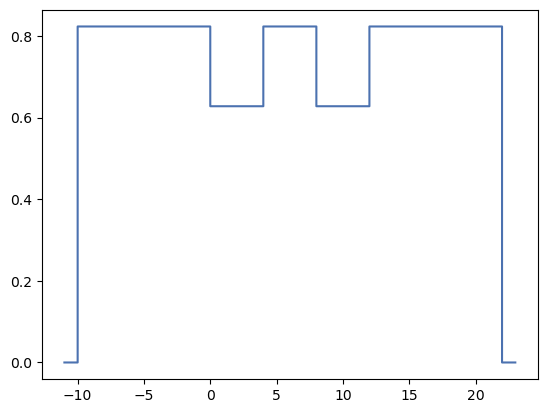

In [70]:
fig, ax = plt.subplots()
ax.plot(x, gamma)

## Recreating Harrison's Figures
Harrison's figures take the bottom of the quantum well to be at 0 potential. Differences in how next**nano**++ calculates the band edges result in a different offset in the values outputted by the software.

We will first obtain the offset with

In [71]:
bandedgeoffset = np.amin(gamma[30:-30]) #Values chosen to avoid the 0 value at the start and end
bandedgeoffset

0.62760532478498

If the offset is known before hand, one can use <code>numpy</code> array manipulation to apply a function on the array

In [72]:
gamma_shift = gamma - bandedgeoffset

### Finding groundstate energies

To find the groundstate energies as a function of the number of wells, we will create a simple function to iterate over all the $N$ wells. The groundstate energies are found in the <code>Quantum</code> subfolder. We first demonstrate how to obtain the groundstate energies for the $N=2$ case and then a way to get the groundstate energies for all $N$ values

In [123]:
nn.DataFile(sweepFolder.go_to('Superlattice_N_Wells__NUMBER_OF_WELLS_2_', 
                                 'bias_00000', 'Quantum','amplitudes_shift_quantum_region_Gamma_00000.dat'), 
                                    product = software).variables['E_1'].value

array([0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804571,
       0.70804571, 0.70804571, 0.70804571, 0.70804571, 0.70804

Every different value of $N$ outputs a different output folder. We have to iterate through the folders to obtain the groundstate energies.

In [74]:
def is_dir(file):
    p = os.path.join(sweep.sweep_output_directory,file)
    return os.path.isdir(p)
    
sweepFiles = list(filter(is_dir, os.listdir(sweep.sweep_output_directory)))
sweepFiles

['Superlattice_N_Wells__NUMBER_OF_WELLS_12_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_17_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_22_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_27_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_2_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_32_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_37_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_42_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_47_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_52_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_57_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_62_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_67_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_72_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_77_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_7_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_82_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_87_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_92_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_97_']

In [100]:
sweepDataFolder = nn.DataFolder(sweep.sweep_output_directory)
sweepFiles = natsort.natsorted(list(sweepDataFolder.folders.keys()))
sweepFiles

['Superlattice_N_Wells__NUMBER_OF_WELLS_2_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_7_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_12_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_17_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_22_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_27_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_32_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_37_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_42_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_47_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_52_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_57_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_62_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_67_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_72_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_77_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_82_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_87_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_92_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_97_']

We observe that the value 10 is at the start of the list. We would like this to be at the end of the list

In [75]:
import natsort
sweepFiles = natsort.natsorted(sweepFiles)# sweepFiles[1:] + [sweepFiles[0]]
sweepFiles 

['Superlattice_N_Wells__NUMBER_OF_WELLS_2_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_7_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_12_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_17_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_22_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_27_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_32_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_37_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_42_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_47_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_52_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_57_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_62_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_67_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_72_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_77_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_82_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_87_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_92_',
 'Superlattice_N_Wells__NUMBER_OF_WELLS_97_']

We now want to store the first eigenstate energies into a single array so that it can be plotted alongside the number of wells. We can obtain all the energies with a simple function.

In [76]:
def get_all_energies(sweepFiles):
    arr = np.array([])
    for file in sweepFiles:
        energy = (nn.DataFile(sweepFolder.go_to(file, 
                                 'bias_00000', 'Quantum','amplitudes_shift_quantum_region_Gamma_00000.dat'), 
                                    product = software).variables['E_1'].value - bandedgeoffset) * 1000
        ##we shift the values downwards by the bandedgeoffset
        ##we also multiply by 1000 to convert from eV to meV
        single_value = np.amin(energy)
        arr = np.append(arr, single_value)
    return arr

groundstate_energies = get_all_energies(sweepFiles)
groundstate_energies

array([80.44038247, 75.30402503, 74.76477749, 74.60698923, 74.5402468 ,
       74.50592045, 74.48597119, 74.47336248, 74.46488961, 74.45892338,
       74.45456439, 74.45128321, 74.44875175, 74.44675785, 74.44515939,
       74.44385838, 74.44278527, 74.44188991, 74.44113495, 74.44049261])

Text(0.5, 1.0, 'Ground state energies')

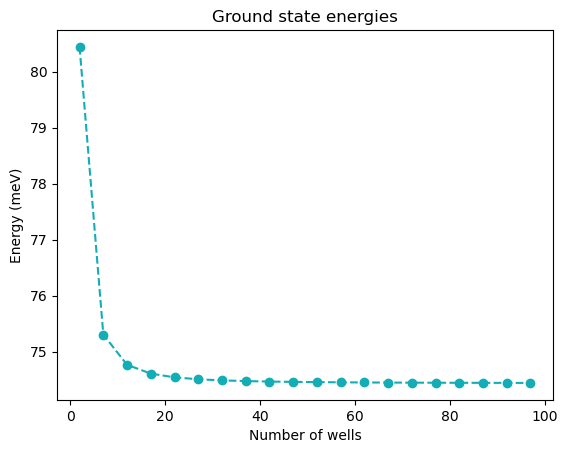

In [77]:
fig, ax = plt.subplots()
ax.plot(SweepValues, groundstate_energies, 'o--', color = palette[1])
# ax.grid(visible = True)
ax.set_ylabel('Energy (meV)')
ax.set_xlabel('Number of wells')
ax.set_title('Ground state energies')

# plt.savefig('./Images/EnergyVsN.png', dpi = 2000)

### Wavefunction in a finite superlattice
The first case has the following parameters:
* 40Å GaAs / 40Å Ga<sub>0.8</sub>Al<sub>0.2</sub>As sandwiched between 200Å Ga<sub>0.8</sub>Al<sub>0.2</sub>As on the left and right.
* 10 wells
* 4nm quantum wells
* 4nm barriers

**Getting the wavefunction and the x coordinates** <br>
We only want the groundstate wavefunction amplitudes.

Note that we cannot use the x-coordinates found in <code>bandedges.dat</code> for <code>amplitudes_shift_quantum_region_Gamma_00000.dat</code> because the dimensions of the array are not equal. We therefore have to plot the following pairs:
* Amplitude of the wavefunction and its corresponding x coordinates
* Bandedge and its corresponding x coordinates

In [78]:
wf1 = (nn.DataFile(sweepFolder.go_to(sweepFiles[-1], 
         'bias_00000', 'Quantum','amplitudes_shift_quantum_region_Gamma_00000.dat'), 
            product = software).variables['Psi_1'].value - bandedgeoffset) * 1000

bandedge10 = (nn.DataFile(sweepFolder.go_to(sweepFiles[-1], 
         'bias_00000', 'bandedges.dat'), 
            product = software).variables['Gamma'].value - bandedgeoffset) * 1000

x = nn.DataFile(sweepFolder.go_to(sweepFiles[-1], 
         'bias_00000', 'bandedges.dat'), 
            product = software).coords['x'].value

xwf1 = nn.DataFile(sweepFolder.go_to(sweepFiles[-1], 
         'bias_00000', 'Quantum','amplitudes_shift_quantum_region_Gamma_00000.dat'), 
            product = software).coords['x'].value

Text(0.5, 1.0, 'Finite Superlattice')

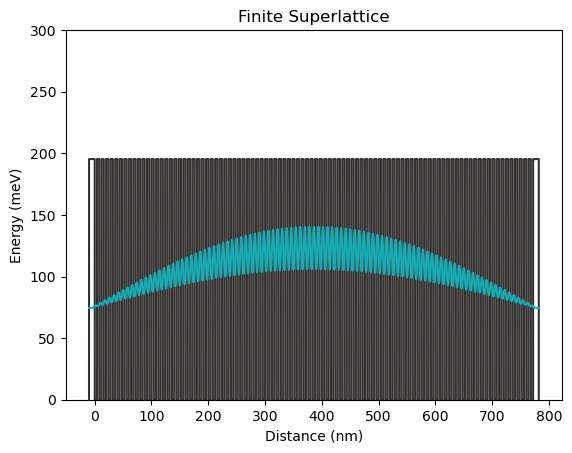

In [79]:
fig, ax = plt.subplots()
ax.plot(x, bandedge10, color = palette[0])
ax.plot(xwf1, wf1, color = palette[1])

ax.set_ylim(0,300)
ax.set_xlabel('Distance (nm)')
ax.set_ylabel('Energy (meV)')
ax.set_title('Finite Superlattice')

# plt.savefig('./Images/wf1.png', dpi = 2000)

### Wavefunction in a multiple quantum well system

The second case plotted has the following parameters:
* 100Å GaAs / 100Å Ga<sub>0.6</sub>Al<sub>0.4</sub>As sandwiched between 100Å Ga<sub>0.6</sub>Al<sub>0.4</sub>As on the left and right.
* 4 wells
* 10nm quantum wells
* 10nm barriers

Note that Ga<sub>x</sub>Al<sub>1-x</sub>As used here is different from the earlier graph plotted.

The alloy composition and the thickness of the barriers and the quantum wells are different in this example. We will use nextnanopy to change the variables and output the result.

In [80]:
input_file.fullpath

'Superlattice_N_Wells.in'

In [81]:
input_file.variables.keys()

odict_keys(['TEMPERATURE', 'WELL_WIDTH', 'BARRIER_WIDTH', 'NUMBER_OF_WELLS', 'SUPERLATTICE_WIDTH', 'LEFT_BARRIER_WIDTH', 'RIGHT_BARRIER_WIDTH', 'FINE_GRID_SPACING', 'COARSE_GRID_SPACING', 'ALLOY_X'])

We want to change
* <code>WELl_WIDTH</code>
* <code>BARRIER_WIDTH</code>
* <code>LEFT_BARRIER_WIDTH</code>
* <code>RIGHT_BARRIER_WIDTH</code>
* <code>NUMBER_OF_WELLS</code>

In addition to this, we will save this new input file into the output folder.

In [89]:
input_file.set_variable(name = "WELL_WIDTH", value = 7)#was 10
input_file.set_variable(name = "BARRIER_WIDTH", value = 9)#was 10
input_file.set_variable(name = "LEFT_BARRIER_WIDTH" , value = 10)#was 10
input_file.set_variable(name = "RIGHT_BARRIER_WIDTH" , value = 10)
input_file.set_variable(name = "NUMBER_OF_WELLS", value = 4)


my_input_file_new = os.path.join(output_folder, r'Superlattice_N_Wells_WF2' + ".in")
input_file.save(my_input_file_new, overwrite = True, automkdir = True)

'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2.in'

We now create a function to run the input file and ouput the result

In [90]:
input_file.execute()

STARTING...
Starting execution as:
C:\Program Files\nextnano\2022_02_22\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\heorhii.yehiazarian\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2022_02_22\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2 --noautooutdir E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2.in 

nextnano++ (1.9.14 - 2021.122001) Feb 22 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomple

    Tridiagonal real symmetric eigenvalue solver:         652         751
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 1.748067554e-10      Residual_HDensity = 1.326591163e-11
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 5.702105454e-13

*----  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS FINISHED ----------------------------

Calculating classical integrated carrier densities as function of energy.

Calculating quantum integrated carrier densities as function of energy.

Calculating classical energy-resolved carrier densities.

Calculating quantum energy-resolved carrier densities.

Solving Quantum Mechanics ---- (quantum regions without density only)


Solving Quantum Mechanics ---- (determine k-dispersion only)

   Calculating interband matrix elements...
   Calculating interband matrix elements...
   Calculating interband matrix elements...
  

{'process': <subprocess.Popen at 0x15a958e2c10>,
 'outputdirectory': 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2',
 'filename': 'Superlattice_N_Wells_WF2',
 'logfile': 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2\\Superlattice_N_Wells_WF2.log',
 'cmd': '"C:\\Program Files\\nextnano\\2022_02_22\\nextnano++\\bin 64bit\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\heorhii.yehiazarian\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Program Files\\nextnano\\2022_02_22\\nextnano++\\Syntax\\database_nnp.in" --threads 0 --outputdirectory "E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2" --noautooutdir "E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2.in"',
 'wdir': 'C:\\Program Files\\nextnano\\2022_02_22\\nextnano++\\bin 64bit'}

In [91]:
input_file.folder_output

'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_output\\Superlattice_N_Wells_WF2'

In [92]:
wf2Folder = nn.DataFolder(input_file.folder_output)

In [93]:
wf2Folder.show_tree()

Superlattice_N_Wells_WF2/
    bias_00000/
        Optical/
            computed_absorption_spectrum_cm-1.dat
            computed_absorption_spectrum_eV.dat
            computed_absorption_spectrum_nm.dat
            computed_absorption_spectrum_THz.dat
            computed_gain_spectrum_cm-1.dat
            computed_gain_spectrum_eV.dat
            computed_gain_spectrum_nm.dat
            computed_gain_spectrum_THz.dat
            computed_imepsilon_spectrum_cm-1.dat
            computed_imepsilon_spectrum_eV.dat
            computed_imepsilon_spectrum_nm.dat
            computed_imepsilon_spectrum_THz.dat
            emission_photon_density.dat
            emission_power_density.dat
            emission_spectrum_photons_cm-1.dat
            emission_spectrum_photons_eV.dat
            emission_spectrum_photons_nm.dat
            emission_spectrum_photons_THz.dat
            emission_spectrum_power_cm-1.dat
            emission_spectrum_power_eV.dat
            emission_spectrum_powe

We will take similar steps to the exercise above where we plotted the wavefunction. 

In [94]:
wf2 = (nn.DataFile(wf2Folder.go_to('bias_00000', 'Quantum', 
                                  'amplitudes_shift_quantum_region_Gamma_00000.dat'), product = software).variables['Psi_1'].value - bandedgeoffset) * 1000

bandedge = (nn.DataFile(wf2Folder.go_to('bias_00000', 'bandedges.dat'), product = software).variables['Gamma'].value - bandedgeoffset) * 1000

x = nn.DataFile(wf2Folder.go_to('bias_00000', 'bandedges.dat'), product = software).coords['x'].value

xwf2 = (nn.DataFile(wf2Folder.go_to('bias_00000', 'Quantum', 'amplitudes_shift_quantum_region_Gamma_00000.dat'), product = software).coords['x'].value)

**Plotting the figure**

Text(0.5, 1.0, 'Multiple Quantum Well')

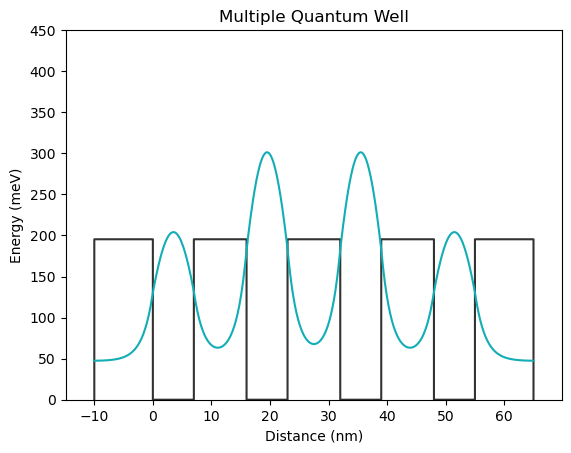

In [95]:
fig, ax = plt.subplots()
ax.plot(x, bandedge, color = palette[0])
ax.plot(xwf2, wf2, palette[1])

ax.set_ylim([0,450])
ax.set_xlabel('Distance (nm)')
ax.set_ylabel('Energy (meV)')
ax.set_title('Multiple Quantum Well')

# plt.savefig('./Images/wf2.png', dpi = 2000)

In [111]:
sweep2 = nn.Sweep({'WELL_WIDTH':[1,2,3,4,5]},input_file.fullpath)
print(sweep2.fullpath)
sweep2.save_sweep()

E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2.in


In [112]:
sweep2.execute_sweep()

STARTING...
Starting execution as:
C:\Program Files\nextnano\2022_02_22\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\heorhii.yehiazarian\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2022_02_22\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2_sweep__WELL_WIDTH0\Superlattice_N_Wells_WF2__WELL_WIDTH_1_ --noautooutdir E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2__WELL_WIDTH_1_.in 

nextnano++ (1.9.14 - 2021.122001) Feb 22 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                  

  valence band maximum: -0.794876818
  conduction band minimum: 0.627605325

 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1          70
      
 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1         250
      
 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1          70
      
 Solving 1 approximate (subspace) 1-band Schroedinger equation(s):
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full real symmetric eigenvalue solver:           1         100
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 2.887534844


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2_sweep__WELL_WIDTH0\Superlattice_N_Wells_WF2__WELL_WIDTH_2_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 45     	spacing = 0.1
    pos = 46     	spacing = 0.1

Grid dimension: 562 * 1 * 1 
Number of unique grid points: 562
Range in 1-direction:   -11 , ... , 46


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction:  not per


Calculating classical energy-resolved carrier densities.

Calculating quantum energy-resolved carrier densities.

Solving Quantum Mechanics ---- (quantum regions without density only)


Solving Quantum Mechanics ---- (determine k-dispersion only)

   Calculating interband matrix elements...
   Calculating interband matrix elements...
   Calculating interband matrix elements...
   Calculating (only) transition energies...
   Calculating (only) transition energies...
   Calculating (only) transition energies...
Calculating integrated generation/recombination/injection rates...

Calculating density-based (semi-classical) emission spectra.

********* OUTPUT ***************************************************************

Writing characteristics data(1)...
Writing characteristics data(2)...

Writing electrostatic potential...
Writing electric field...

Writing band gaps...
Writing band edges...

Writing electron mobility...
Writing hole mobility...
Writing integrated recombination rates...


Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition:   iteration = 2 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fi


Material database initialized.

Checking license:
	 Valid From: 2021-5-3 To: 2022-12-31
	 Licensed to: E-mail: heorhii.yehiazarian@nextnano.com-2022-12-31-nxt3

********* SETUP SIMULATION *****************************************************

NOTE: Using output directory specified from command line (nextnanomat), 

NOTE: Setting output directory to: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2_sweep__WELL_WIDTH0\Superlattice_N_Wells_WF2__WELL_WIDTH_4_\

********* Simulation Grid *********

Creating grid 1 using:
    pos = -11     	spacing = 1
    pos = -10     	spacing = 0.1
    pos = 53     	spacing = 0.1
    pos = 54     	spacing = 0.1

Grid dimension: 642 * 1 * 1 
Number of unique grid points: 642
Range in 1-direction:   -11 , ... , 54


********* Rotation Matrix *********
 1.0000000,  0.0000000,  0.0000000
 0.0000000,  1.0000000,  0.0000000
 0.0000000,  0.0000000,  1.0000000

********* Periodicity *************
  0-direction:  not per

 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         382         631
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         562         631
      
 Solving 1 exact 1-band Schroedinger equation(s):
    Tridiagonal real symmetric eigenvalue solver:         532         631
      

Computing densities...

QUANTUM-CURRENT-POISSON:   Residual_EDensity = 7.269469375e-13      Residual_HDensity = 6.144250005e-14
QUANTUM-CURRENT-POISSON:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00
QUANTUM-CURRENT-POISSON:   Residual_Potential = 0.000000000e+00

*----  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS FINISHED ----------------------------

Calculating classical integrated carrier densities as function of energy.

Calculating quantum integrated carrier densities as function of energy.

Calculating classical energy-resolved carrier densities.

Calculating 


Computing densities...

******  SOLVING QUANTUM-CURRENT-POISSON EQUATIONS *----------------------------
*----  Terminates after:   max_iter = 1000
                        residual =       1.000000000e+06[carriers/cm^2]
                        residual_fermi = 1.000000000e-08
Set Fermi level range: -0 -0

QUANTUM-CURRENT-POISSON:  iteration = 1 of 1000 ----------------------------

Current-repetition:   iteration = 1 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fixed generation/recombination/injection...

Solving electron current equation(s)...

Solving hole current equation(s)...

Computing densities...

Current-Density:   Residual_EFermilevel = 0.000000000e+00   Residual_HFermilevel = 0.000000000e+00

Current-repetition:   iteration = 2 of 2 -------------

Calculating electron mobility...
Calculating hole mobility...
Calculating variable recombination and generation...
Calculating fi

In [116]:
sweep_output_dir = nn.DataFolder(sweep2.sweep_output_directory)
print(sweep_output_dir)

DataFolder
fullpath: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_WF2_sweep__WELL_WIDTH0
Folders: 5
Superlattice_N_Wells_WF2__WELL_WIDTH_1_
Superlattice_N_Wells_WF2__WELL_WIDTH_2_
Superlattice_N_Wells_WF2__WELL_WIDTH_3_
Superlattice_N_Wells_WF2__WELL_WIDTH_4_
Superlattice_N_Wells_WF2__WELL_WIDTH_5_
Files:
['sweep_info.txt']


In [121]:
sweepDirs = sweep_output_dir.folders.keys()
print(sweepDirs)
sweepDirs = natsort.natsorted(sweepDirs)

odict_keys(['Superlattice_N_Wells_WF2__WELL_WIDTH_1_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_2_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_3_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_4_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_5_'])
['Superlattice_N_Wells_WF2__WELL_WIDTH_1_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_2_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_3_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_4_', 'Superlattice_N_Wells_WF2__WELL_WIDTH_5_']


In [122]:
groundstate_energies = get_all_energies(sweepDirs)

ValueError: No such file or directory E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_output\Superlattice_N_Wells_sweep__NUMBER_OF_WELLS3\Superlattice_N_Wells_WF2__WELL_WIDTH_1_\bias_00000\Quantum\amplitudes_shift_quantum_region_Gamma_00000.dat